# Äpfel und Birnen

In [1]:
import numpy as np
import pandas as pd

# Die folgenden Importe sind für Grafiken:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Bonus: In dieser Zelle erstellen wir einen künstlichen Datensatz. 
# Wer das nicht nachvollziehen will, kann den Code ausführen und überspringen.

# Wir generieren Zufallsdaten mit den Bedinungen
# 50% der Äpfel sind rot, 20% grün und 30% gelb
# 100% der Äpfel sind rund
# 50% der Birnen sind grün, 50% sind gelb
# 90% der Birnen sind länglich, 10% sind rund
# Sowohl Äpfel als auch Birnen können zwischen 150 und 300 gramm wiegen

# zufallszahl 0 oder 1
typ = np.random.randint(0, 2, size=1000)

# zufallszahl zwishen 150 und 300
gewicht = np.random.randint(150, 300, size=1000)

form = np.random.random(size=1000)
form[np.where(typ==0)] = 0
form[np.where((typ==1)&(form>.9))] = 0
form = np.where(form>0, 1, 0)

farbe = np.random.random(size=1000)
farbe[np.where((typ==0)&(farbe<=0.5))]=0
farbe[np.where((typ==0)&(farbe>0.8))]=2
farbe[np.where((typ==1)&(farbe<=0.5))]=2
farbe[np.where((typ==1)&(farbe>0.5))]=1
farbe = farbe.astype('int')

# das Ganze wird als Dataframe gespeichert
obst = pd.DataFrame({'typ': typ, 'form': form, 'farbe': farbe, 'gewicht': gewicht})

In [6]:
# Jetzt können wir uns den Datensatz anschauen

obst.head(10)

,farbe,form,gewicht,typ
0,0,0,252,0
1,0,0,178,0
2,1,1,292,1
3,1,1,253,1
4,1,1,253,1
5,0,0,178,0
6,0,0,208,0
7,0,0,210,0
8,1,1,178,1
9,1,1,282,1


In [7]:
obst.sort_values(by='gewicht', ascending=True).head(10)

,farbe,form,gewicht,typ
127,0,0,150,0
792,1,1,150,1
575,2,0,150,0
152,0,0,150,0
553,1,1,150,1
795,1,1,150,1
876,0,0,150,0
937,1,0,151,1
199,1,1,151,1
57,1,1,152,1


In [8]:
obst.describe()

,farbe,form,gewicht,typ
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.681000,0.453000,225.232000,0.515000
std,0.619373,0.498035,43.635309,0.500025
min,0.000000,0.000000,150.000000,0.000000
25%,0.000000,0.000000,187.000000,0.000000
50%,1.000000,0.000000,227.500000,1.000000
75%,1.000000,1.000000,263.000000,1.000000
max,2.000000,1.000000,299.000000,1.000000


In [ ]:
# Bonus: Wieviel wiegt das ganze Obst?
# Bonus: Wieviele Äpfel sind in dem Datensatz? Wiegen Äpfel mehr als Birnen?

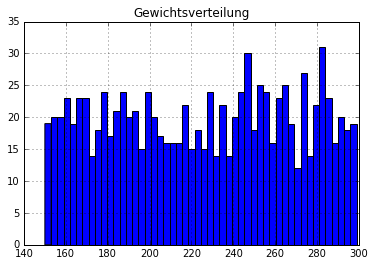

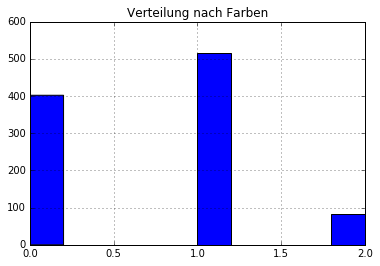

In [9]:
# Daten lassen sich graphisch oft leichter auswerten. Wir plotten ein Histogramm der verschiedenen Werte. Mit Pandas
# geht das ganz einfach durch eine eingebaute Funktion:

obst.gewicht.hist(bins=50)
plt.title('Gewichtsverteilung')
#neues Bild
plt.figure()
obst.farbe.hist()
plt.title('Verteilung nach Farben')

# Wir haben die Verteilungen selbst vorgegeben. Passt das?

In [ ]:
# Bonus: Ist das Gewicht überhaupt wichtig?
# Google hilft, eine Korrelationsmatrix zu erzeugen!

# Logistische Regression

In [11]:
# Wir nehmen die ersten 800 Zeilen aus dem Datensatz als Trainingsdaten. Die letzten 200 Zeilen sind Testdaten, um
# zu überprüfen, um unser Modell was vernünftiges gelernt hat.
X_train = obst[['form', 'farbe', 'gewicht']][0:800]
y_train = obst['typ'][0:800]

X_test = obst[['form', 'farbe', 'gewicht']][800:]
y_test = obst['typ'][800:]

In [12]:
# Es gibt ein Paket namens sklearn, das die meisten üblichen Data Science Modelle bietet. Man kann damit sehr weit
# kommen!
# Wir importieren die Logistische Regression
from sklearn.linear_model import LogisticRegression
# Dann initiieren wir eine Instanz der LogReg
lr = LogisticRegression()
# Diese hat eine funkition fit - wir fitten die LogReg an die Trainingsdaten (bzw. Sklearn und Python machen das für
# uns). Man spricht auch davon, ein Modell auf den Daten zu trainieren. (Deswegen X_train)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Weil es ein einfaches Modell war und der Datensatz auch nicht sehr groß ist, ging das sehr schnell. Es kann auch schon mal mehrere Tage dauern!

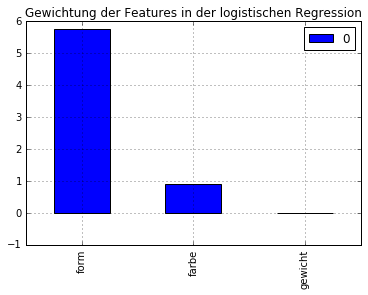

In [23]:
# Die berechneten Koeffizienten können wir uns auch anzeigen lassen

coefs = pd.DataFrame(lr.coef_[0], index=['form', 'farbe', 'gewicht'])
coefs.plot.bar(grid=True)
plt.title('Gewichtung der Features in der logistischen Regression')

# Stimmt es mit unseren Erwartungen überein?

In [13]:
# Nun wollen wir unser Modell testen. Dafür lassen wir unser Modell für den Testdatensatz vorhersagen, ob es sich um
# Äpfel oder Birnen handelt. Das können wir dann mit der richtigen Antwort vergleichen, die in y_test gespeichert ist.

prediction = lr.predict(X_test)

print('Wahrheit')

print(y_test.values)

print()
print('Vorhersage')
print(prediction)

# Das Modell gibt uns nicht nur eine Vorhersage, ob es sich um einen Apfel oder eine Birne handelt, sondern auch
# wie sicher es sich ist.
print('Warhrscheinlichkeit, dass es eine Birne')
p_birne = lr.predict_proba(X_test)[:,1]

print()
print(p_birne)

[0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0]

[0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0]

[0.33234575 0.98431843 0.98527004 0.98359678 0.07679969 0.98361477
 0.98301094 0.0779942  0.07301365 0.07005127 0.98520516 0.06940022
 0.98276711 0.98505814 0.98523763 0.98443848 0.984

In [ ]:
# Wie können wir entscheiden, ob es sich um ein gutes oder schlechtes Modell handelt?

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
print('True positives: \t{}\nTrue negatives: \t{}\nFalse positives: \t{}\nFalse negatives:\t{}'.format(tp, tn, fp, fn))
# Man beachte, dass wir hier die ganze Zeit von Birnen sprechen!

Wir können sehr viele verschiedene Methoden der Auswertung finden, aber wir müssen trotzdem selbst entscheiden, ob das Modell gut genug ist!

Man betrachtet dafür oft Sensitivität und Spezifizität, was viele auch schon aus dem Studium kennen sollten. Anders nennt man das auch (leichter zu merken) true positive rate und true negative rate.
https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [ ]:
# Übung
# Man betrachtet in der Regel nicht die Stück- sondern die Prozenzahlen. Diese wollen wir nun berechnen.

# True negative rate: Wenn wir "Birne" geraten haben, wie oft war es wirklich eine Birne?
# tnr = true positives / all positive guesses

# True positive rate: Wieviele der Birnen aus dem Datensatz haben wir gefunden?
# tpr = true postivies / total true objects in the dataset

# Wie würden wir das formulieren, wenn unser Algorithmus Karies entdecken würde? Welche Anforderungen würden wir an
# einen Algorithmus haben?